In [2]:
import gym
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from collections import deque

Using TensorFlow backend.


In [3]:
class DeepQN:
    def __init__(self, env):
        self.env = env
        self.memory = deque(maxlen=10000)
        self.gamma = 0.99
        self.epsilon = 1.0
        self.epsilon_min = 0.005
        self.epsilon_decay = (self.epsilon - self.epsilon_min) / 50000
        self.batch_size = 64
        self.train_start = 1000
        self.state_size = self.env.observation_space.shape[0]
        self.action_size = self.env.action_space.n
        self.learning_rate = 0.001
        self.model = self.create_model()
        self.target_model = self.create_model()

    def create_model(self):
        model = Sequential()
        model.add(Dense(
            32, input_dim=self.state_size, activation='relu', kernel_initializer="he_uniform"))
        model.add(Dense(16, activation='relu', kernel_initializer="he_uniform"))
        model.add(Dense(self.env.action_space.n, activation="linear",
                        kernel_initializer="he_uniform"))
        model.compile(
            loss="mean_squared_error", optimizer=Adam(lr=self.learning_rate))
        return model

    def act(self, state):
        # Decay exploration rate by epsilon decay
        if self.epsilon > self.epsilon_min:
            self.epsilon -= self.epsilon_decay
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        return np.argmax(self.model.predict(state)[0])

    def remember(self, state, action, reward, new_state, done):
        self.memory.append([state, action, reward, new_state, done])

    def replay(self):
        if len(self.memory) < self.train_start:
            return

        mini_batch = random.sample(self.memory, self.batch_size)

        update_input = np.zeros((self.batch_size, self.state_size))
        update_target = np.zeros((self.batch_size, self.action_size))

        for i in range(self.batch_size):
            state, action, reward, next_state, done = mini_batch[i]
            target = self.model.predict(state)[0]

            if done:
                target[action] = reward
            else:
                target[action] = reward + self.gamma * \
                    np.amax(self.target_model.predict(next_state)[0])
            update_input[i] = state
            update_target[i] = target

        self.model.fit(update_input, update_target,
                       batch_size=self.batch_size, epochs=1, verbose=0)

    def target_train(self):
        # Simply copy the weights of the model to target_model
        self.target_model.set_weights(self.model.get_weights())
        return

    def save_model(self, fn):
        self.model.save(fn)

In [35]:
env = gym.make("MountainCar-v0")
trials = 400
trial_len = 200
all_rewards = []
best_score = 200
# best_weights = None
agent = DeepQN(env=env)
# best_model = agent.create_model()

In [ ]:
for trial in range(trials):
  cur_state = env.reset().reshape(1, 2)
  score = 0
  for step in range(trial_len):
      action = agent.act(cur_state)
      new_state, reward, done, _ = env.step(action)
      new_state = new_state.reshape(1, 2)
      if new_state[0][0] > -0.2:
        reward = 1
      agent.remember(cur_state, action, reward, new_state, done)
      score += reward 
      agent.replay()

      cur_state = new_state
      if done:
          env.reset()
          agent.target_train()
          break

  all_rewards.append(score)

  print("Iteration: {} Score: {}".format(trial, score))

Iteration: 0 Score: -200.0
Iteration: 1 Score: -200.0
Iteration: 2 Score: -200.0
Iteration: 3 Score: -200.0
Iteration: 4 Score: -200.0
Iteration: 5 Score: -200.0
Iteration: 6 Score: -200.0
Iteration: 7 Score: -200.0
Iteration: 8 Score: -200.0
Iteration: 9 Score: -200.0
Iteration: 10 Score: -200.0
Iteration: 11 Score: -200.0
Iteration: 12 Score: -200.0
Iteration: 13 Score: -200.0
Iteration: 14 Score: -200.0
Iteration: 15 Score: -200.0
Iteration: 16 Score: -200.0
Iteration: 17 Score: -200.0
Iteration: 18 Score: -200.0
Iteration: 19 Score: -200.0
Iteration: 20 Score: -200.0
Iteration: 21 Score: -200.0
Iteration: 22 Score: -200.0
Iteration: 23 Score: -200.0
Iteration: 24 Score: -200.0
Iteration: 25 Score: -200.0
Iteration: 26 Score: -200.0
Iteration: 27 Score: -200.0
Iteration: 28 Score: -200.0
Iteration: 29 Score: -200.0
Iteration: 30 Score: -200.0
Iteration: 31 Score: -200.0
Iteration: 32 Score: -200.0
Iteration: 33 Score: -200.0
Iteration: 34 Score: -200.0
Iteration: 35 Score: -200.0
It

Iteration: 288 Score: -88.0
Iteration: 289 Score: -98.0
Iteration: 290 Score: -120.0
Iteration: 291 Score: -108.0
Iteration: 292 Score: -126.0
Iteration: 293 Score: -104.0
Iteration: 294 Score: -108.0
Iteration: 295 Score: -110.0
Iteration: 296 Score: -120.0
Iteration: 297 Score: -122.0
Iteration: 298 Score: -120.0
Iteration: 299 Score: -112.0
Iteration: 300 Score: -126.0
Iteration: 301 Score: -122.0
Iteration: 302 Score: -156.0
Iteration: 303 Score: -132.0
Iteration: 304 Score: -142.0
Iteration: 305 Score: -132.0
Iteration: 306 Score: -166.0
Iteration: 307 Score: -156.0
Iteration: 308 Score: -154.0
Iteration: 309 Score: -166.0
Iteration: 310 Score: -126.0
Iteration: 311 Score: -144.0
Iteration: 312 Score: -144.0
Iteration: 313 Score: -186.0
Iteration: 314 Score: -166.0
Iteration: 315 Score: -182.0
Iteration: 316 Score: -170.0
Iteration: 317 Score: -174.0
Iteration: 318 Score: -190.0
Iteration: 319 Score: -184.0
Iteration: 320 Score: -146.0
Iteration: 321 Score: -140.0
Iteration: 322 S

In [12]:
agent.model.save("original_mlp2_400.h5")

In [ ]:
if best_weights != None:
    best_model.set_weights(best_weights)
    best_model.save("best_mlp1.h5")

In [14]:
all_rewards2 = [-1*i for i in all_rewards]

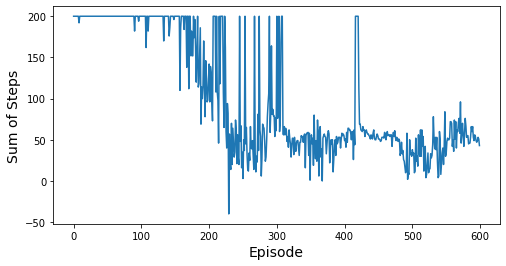

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(all_rewards2)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of Steps", fontsize=14)
plt.show()

In [26]:
first_win = -1
for i,value in enumerate(all_rewards2):
  if value < 200:
    first_win = i
    break

In [27]:
print("mean reward: ",np.mean(all_rewards2),", best reward:",np.min(all_rewards2),", first win episode:",first_win)

mean reward:  103.035 , best reward: -40.0 , first win episode: 8


In [34]:
np.mean(all_rewards2[:200]),np.mean(all_rewards2[:300]),np.mean(all_rewards2[:400]),np.mean(all_rewards2[:500]),

(189.675, 153.41666666666666, 128.8375, 114.642)

# **Test**

In [20]:
# env = gym.make("MountainCar-v0")
import keras

loaded_model = keras.models.load_model('original_mlp2_400.h5')

trials = 100
trial_len = 200
all_rewards_test = []
for trial in range(trials):
    cur_state = env.reset().reshape(1, 2)
    for step in range(trial_len):
        action = np.argmax(loaded_model.predict(cur_state)[0])
        cur_state, reward, done, _ = env.step(action)
        cur_state = cur_state.reshape(1, 2)
        if done:
            env.reset()
            break
    all_rewards_test.append(step+1)
    print("Iteration: {} Score: -{}".format(trial, step+1))

Iteration: 0 Score: -159
Iteration: 1 Score: -160
Iteration: 2 Score: -167
Iteration: 3 Score: -165
Iteration: 4 Score: -160
Iteration: 5 Score: -158
Iteration: 6 Score: -161
Iteration: 7 Score: -167
Iteration: 8 Score: -159
Iteration: 9 Score: -159
Iteration: 10 Score: -159
Iteration: 11 Score: -167
Iteration: 12 Score: -158
Iteration: 13 Score: -159
Iteration: 14 Score: -166
Iteration: 15 Score: -164
Iteration: 16 Score: -159
Iteration: 17 Score: -160
Iteration: 18 Score: -160
Iteration: 19 Score: -169
Iteration: 20 Score: -164
Iteration: 21 Score: -158
Iteration: 22 Score: -158
Iteration: 23 Score: -162
Iteration: 24 Score: -159
Iteration: 25 Score: -167
Iteration: 26 Score: -161
Iteration: 27 Score: -166
Iteration: 28 Score: -160
Iteration: 29 Score: -161
Iteration: 30 Score: -158
Iteration: 31 Score: -159
Iteration: 32 Score: -158
Iteration: 33 Score: -158
Iteration: 34 Score: -159
Iteration: 35 Score: -159
Iteration: 36 Score: -160
Iteration: 37 Score: -161
Iteration: 38 Score: -

In [21]:
first_win = -1
for i,value in enumerate(all_rewards_test):
  if value < 200:
    first_win = i
    break

In [23]:
print("mean reward: ",np.mean(all_rewards_test),", best reward:",np.min(all_rewards_test),", first win episode:",first_win)

mean reward:  160.795 , best reward: 158 , first win episode: 0


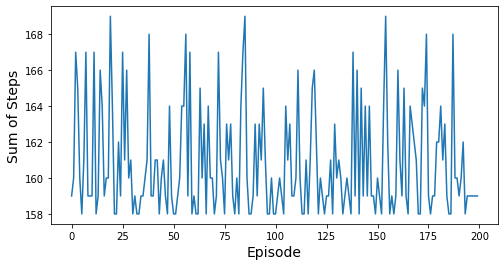

In [24]:
plt.figure(figsize=(8, 4))
plt.plot(all_rewards_test)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of Steps", fontsize=14)
plt.show()